### Chapter 1

#### Exploratory Data Analysis

In [1]:
suppressMessages(library(tidyverse))

Loading the data

In [2]:
state <- read_csv('psds_data/state.csv',)

Parsed with column specification:
cols(
  State = col_character(),
  Population = col_integer(),
  Murder.Rate = col_double(),
  Abbreviation = col_character()
)


Looking at the top 5 rows of the data

In [3]:
head(state, n =5)

State,Population,Murder.Rate,Abbreviation
Alabama,4779736,5.7,AL
Alaska,710231,5.6,AK
Arizona,6392017,4.7,AZ
Arkansas,2915918,5.6,AR
California,37253956,4.4,CA


#### Data Location

Calculate the mean Population of all data.

In [4]:
mean(state[['Population']])

[1] 6162876

Calculating the trimmed mean for all data.

In [5]:
mean(state[['Population']], trim = 0.1)

[1] 4783697

Calculating the median of all Population data.

In [6]:
median(state[['Population']])

[1] 4436370

Calculating the average murder rate for the whole country.

In [7]:
mean(state[['Murder.Rate']])

[1] 4.066

Calculating the murder rate weighted by the state population.

In [8]:
weighted.mean(state[['Murder.Rate']], w = state[['Population']])

[1] 4.445834

R does not have a built in function to calculate the weighted median. We will load the matrixStats and use that for getting the weighted median.

In [9]:
suppressMessages(library(matrixStats))

Warning message:
"package 'matrixStats' was built under R version 3.5.3"

In [10]:
weightedMedian(state[['Murder.Rate']], w = state[['Population']])

[1] 4.4

In this case the weighted mean and the median are almost the same.

#### Data Variability

After looking at the location of the data, we will look at the variability of the data.

Calculating the standard deviation of the Population data.

In [11]:
sd(state[['Population']]) %>% round(0) # Rounding 

[1] 6848235

Calculating the IQR (Interquartile Range). This is the difference between the 25th and the 75th percentile.

In [12]:
IQR(state[['Population']])

[1] 4847308

Calculating the Median absolute deviation form Median (MAD). This measure is not sensitive to outliers.

In [13]:
mad(state[['Population']])

[1] 3849870

#### Exploring Data Distribution

Calculating the percentiles if the data.

In [14]:
quantile(state[['Murder.Rate']])

0%    25%    50%    75%   100% 
 0.900  2.425  4.000  5.550 10.300

We can change the percentile values.

In [15]:
quantile(state[['Murder.Rate']], p = c(0.05,0.35,0.5,0.8,0.95))

5%   35%   50%   80%   95% 
1.600 2.915 4.000 5.700 6.510

From the above data we can see the median Murder rate was 4. We can also observe other percentile values.

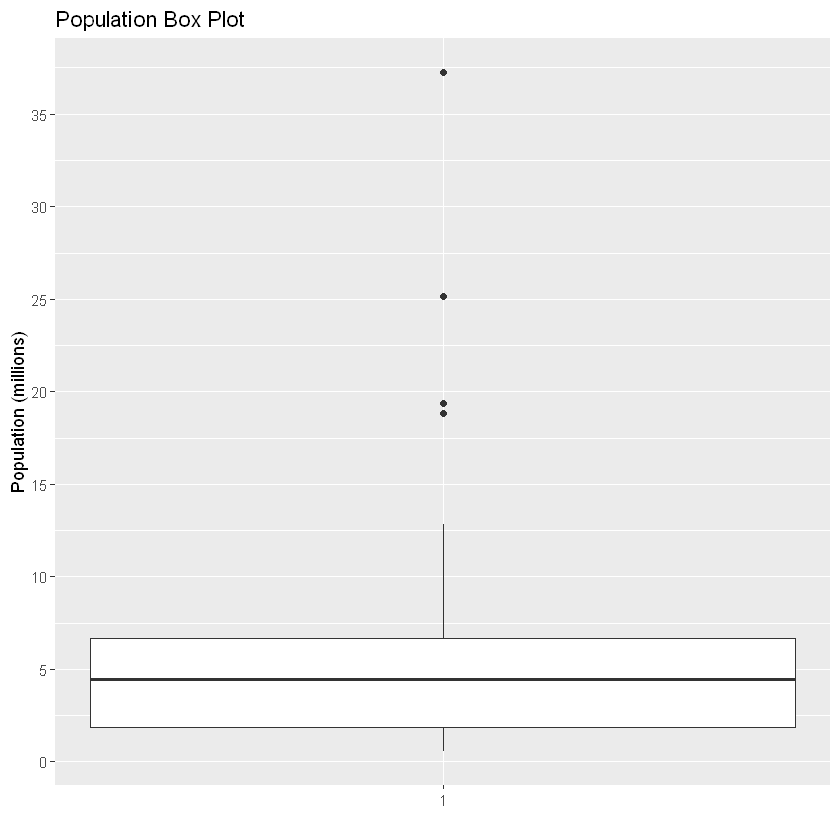

In [16]:
state %>%
  mutate(temp = 1) %>%
  mutate(Population = Population/1000000) %>%
  ggplot(aes(x = temp, y = Population)) +
  geom_boxplot() +
  scale_x_continuous(breaks = seq(0,10.10)) +
  labs(x = '', y = "Population (millions)", title = 'Population Box Plot') +
  scale_y_continuous(breaks = seq(0,100,5))


Build a Frequency Table. In the below code we have divided the states into 11 groups based on the population size.

In [17]:
print(state %>%
  mutate(Population = Population/1000000) %>%
  group_by(group = cut(Population, breaks = seq(from = min(Population),
                                                to = max(Population), length = 11),
                      right = TRUE, include.lowest = TRUE)) %>%
     ungroup() %>%
     group_by(group) %>%
     summarise(freq = n()))

# A tibble: 8 x 2
  group         freq
  <fct>        <int>
1 [0.564,4.23]    24
2 (4.23,7.9]      14
3 (7.9,11.6]       6
4 (11.6,15.2]      2
5 (15.2,18.9]      1
6 (18.9,22.6]      1
7 (22.6,26.2]      1
8 (33.6,37.3]      1


We can see that there are 24 states that fall in the 564000 to 4.23million bucket. We can see which states belong to which bucket in the code below.

In [18]:
print(state %>%
  mutate(Population = Population/1000000) %>%
  group_by(group = cut(Population, breaks = seq(from = min(Population),
                                                to = max(Population), length = 11), 
                       right = TRUE, include.lowest = TRUE)) %>%
  arrange(group), n = 100)

# A tibble: 50 x 5
# Groups:   group [8]
   State          Population Murder.Rate Abbreviation group       
   <chr>               <dbl>       <dbl> <chr>        <fct>       
 1 Alaska              0.710         5.6 AK           [0.564,4.23]
 2 Arkansas            2.92          5.6 AR           [0.564,4.23]
 3 Connecticut         3.57          2.4 CT           [0.564,4.23]
 4 Delaware            0.898         5.8 DE           [0.564,4.23]
 5 Hawaii              1.36          1.8 HI           [0.564,4.23]
 6 Idaho               1.57          2   ID           [0.564,4.23]
 7 Iowa                3.05          1.9 IA           [0.564,4.23]
 8 Kansas              2.85          3.1 KS           [0.564,4.23]
 9 Maine               1.33          1.6 ME           [0.564,4.23]
10 Mississippi         2.97          8.6 MS           [0.564,4.23]
11 Montana             0.989         3.6 MT           [0.564,4.23]
12 Nebraska            1.83          2.9 NE           [0.564,4.23]
13 Nevada            

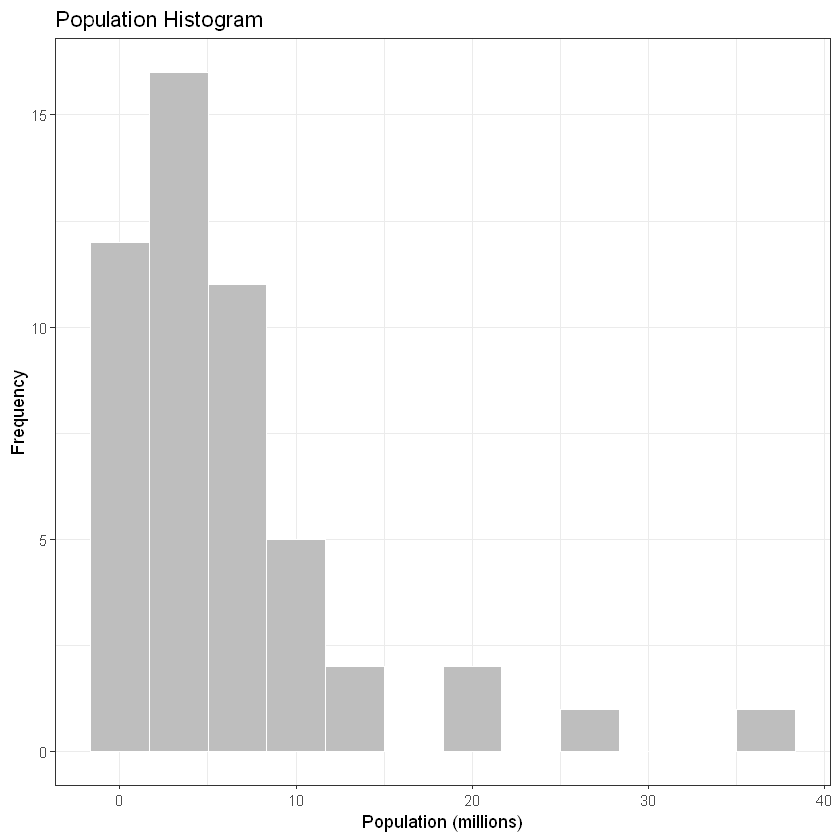

In [19]:
state %>%
  mutate(Population = Population/1000000) %>%
  ggplot(aes(x = Population)) +
  geom_histogram(bins = 12, color = 'white', fill = 'grey') + 
  labs(x = 'Population (millions)', y = "Frequency", title = "Population Histogram") +
  theme_bw()

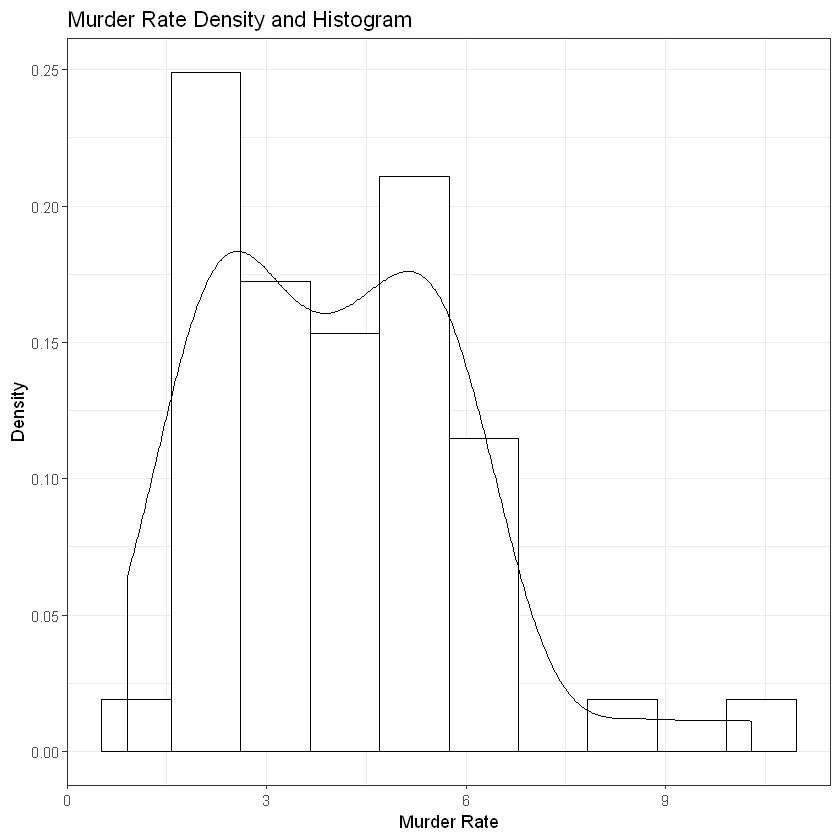

In [20]:
state %>%
  ggplot(aes(x = Murder.Rate)) +
  geom_histogram(aes(y = ..density..),
                 bins = 10,
                 color = 'black',
                 fill = 'white') +
  geom_density(position = 'stack') +
  labs(x = 'Murder Rate', y = 'Density', title = "Murder Rate Density and Histogram") +
  theme_bw()

Next we will analyze the relationship between stocks and the etf. For that we will load the S&P500 price data and the sector data.

In [21]:
sp_price <- read_csv('psds_data/sp500_data.csv')
sp_sector <- read_csv('psds_data/sp500_sectors.csv')

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_date(format = "")
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  sector = col_character(),
  sector_label = col_character(),
  sub_sector = col_character(),
  symbol = col_character()
)


In [22]:
dim(sp_price)

[1] 5647  518

The price data has 5647 rows and 518 columns.

In [23]:
dim(sp_sector)

[1] 517   4

The sector data has 517 rows and 4 columns.

We will build the correlation matrix of stocks belonging to the Telecommunication sector.

In [24]:
tele_tickers <- c("T", "CTL", "FTR", "VZ", "LVLT")

sp_price[tele_tickers] %>%
  cor()

,T,CTL,FTR,VZ,LVLT
T,1.00000000,0.40585278,0.28327866,0.61703529,0.06154493
CTL,0.40585278,1.00000000,0.37764400,0.38575180,0.05453432
FTR,0.28327866,0.37764400,1.00000000,0.28929482,0.06731346
VZ,0.61703529,0.38575180,0.28929482,1.00000000,0.04591859
LVLT,0.06154493,0.05453432,0.06731346,0.04591859,1.00000000


But its better to visualize the data. We will use the corrplot library to plot the data.

In [25]:
suppressMessages(library(corrplot))

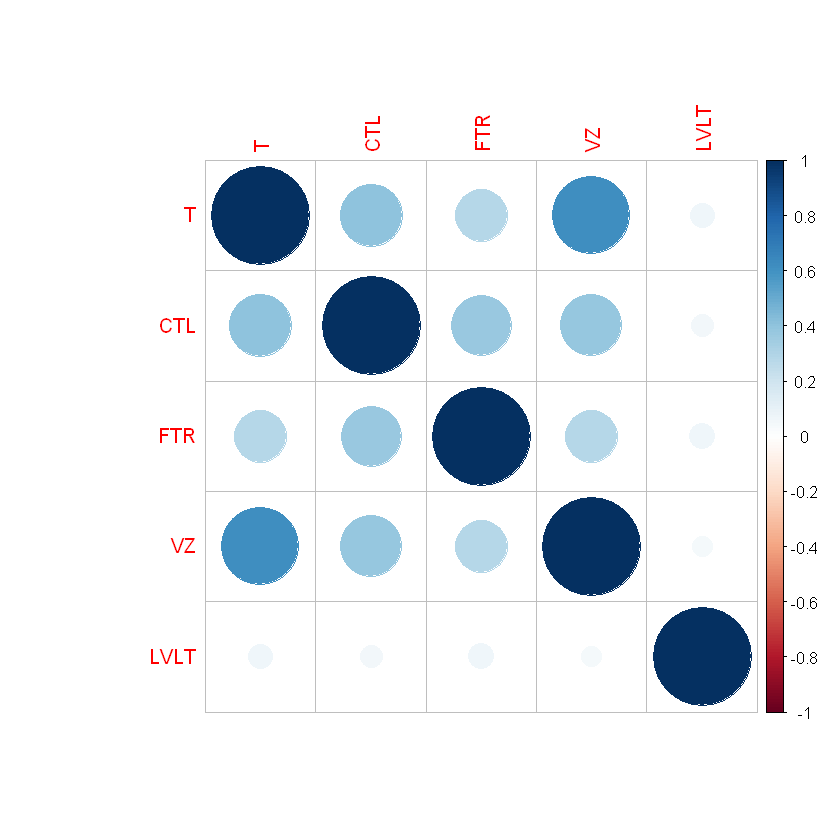

In [26]:
sp_price[tele_tickers] %>%
  cor() %>%
  corrplot()

We can visualize that AT&T and Verizon have a high correlation compared to other stocks.

We can extend this some of the major sectors.

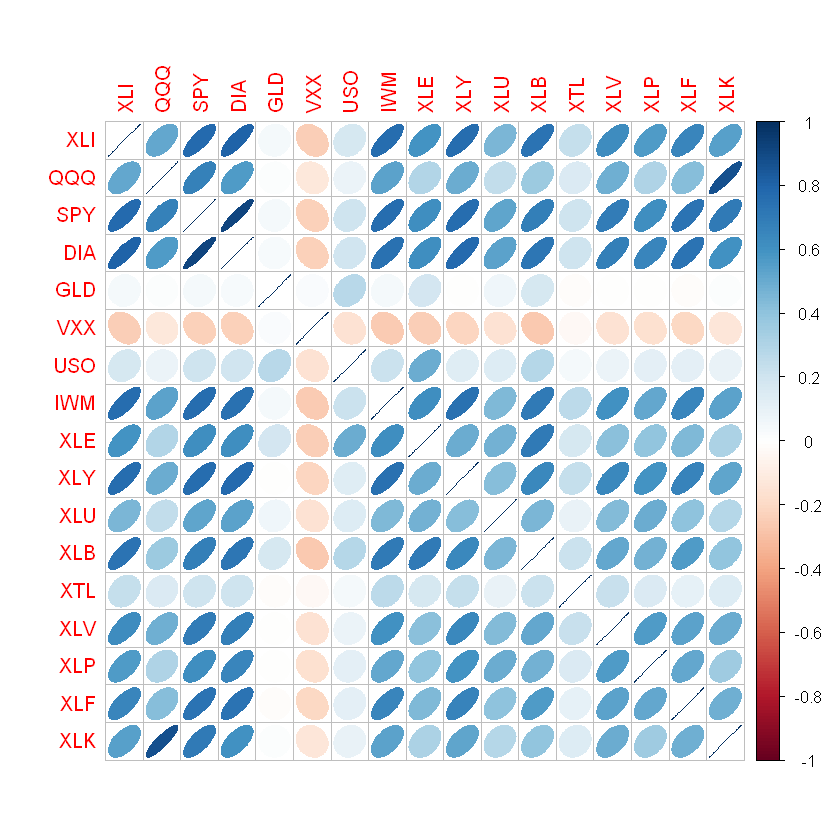

In [27]:
sector_tickers <- sp_sector %>%
  filter(sector == 'etf') %>%
  select(symbol) %>%
  .[[1]]

sp_price[sector_tickers] %>%
  cor() %>%
  corrplot(method = 'ellipse')

We can see that GLD, USO and XTL etfs have low correlation with other sectors.

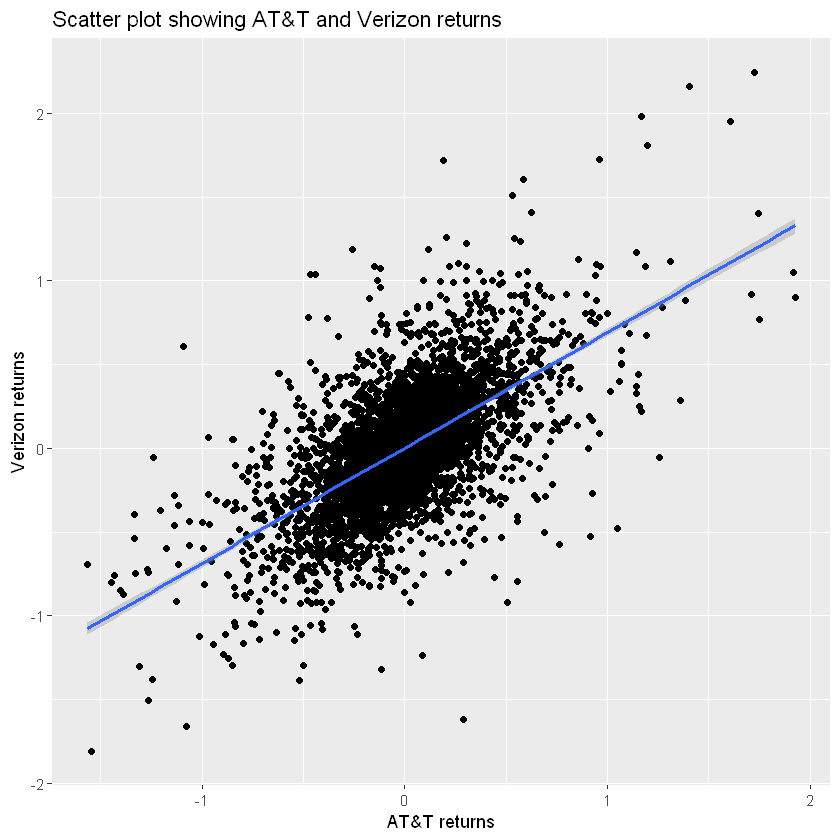

In [28]:
sp_price %>%
  select(c(T,VZ)) %>%
  ggplot(aes(x = T, y = VZ)) +
  geom_point() +
  geom_smooth(method = 'lm') +
  labs(x = 'AT&T returns',
       y = 'Verizon returns',
       title = "Scatter plot showing AT&T and Verizon returns")

# Note
The data used to produce this chart was downloaded from the author's google drive. https://drive.google.com/drive/folders/0B98qpkK5EJemYnJ1ajA1ZVJwMzg <br>

It appears that the returns data is wrong. The equity stock returns cannot go below -100%. We used the data to demonstrate how to create the chart, and not to drawn any conclusions.